In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

### 6.	Reading the Data Set/Analysing/Cleansing using Panda

In [2]:
df=pd.read_csv('car data.csv')

#### Checking Top 5 values of our data

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Checking size of our Data.

In [4]:
df.shape

(301, 9)

#### Finding Unique Vales in Categoria Data

In [5]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Petrol' 'Diesel' 'CNG']
['Petrol' 'Diesel' 'CNG']


#### Finidng Information on all columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Since, Car Name, fuel, seller_type, transmission, owner columns contain object items, we will categorised it with dummy values and assign categories for them.

In [7]:
df.nunique()[:10].sort_values(ascending=False)

Kms_Driven       206
Selling_Price    156
Present_Price    147
Car_Name          98
Year              16
Fuel_Type          3
Owner              3
Seller_Type        2
Transmission       2
dtype: int64

### Data Cleansing

#### Identifying NaN Values

Identifying Nan values in data which can result in bad analysis. So we will remove NaN values from the data.

In [8]:
##check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Since, We arranged and clean our data using excel, we dont have any missing values here. if we would had we can drop that row to avoid any misprediction.

#### Finding Outliers

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


We dont have outliers as well.

### 7. Final Data Preparation and Processing

In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Now we will create a Data Set without Car Name as it is not required for our models.

So, our Final Dataset will be now:

In [11]:
final_dataset=df[['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

Now we will add a new feature as Current year So that we can find out number of years which wil determine age of car.

In [12]:
final_dataset['Current Year']=2021

In [13]:
final_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [14]:
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['Year']

Now we can romove both column year and Current year as we have our derived feature from it.

In [15]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [16]:
final_dataset.drop(['Current Year'],axis=1,inplace=True)

In [17]:
final_dataset.drop(['Car_Name'],axis=1,inplace=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


Now will convert categorial data to numerical using get dummies function

In [19]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

Now our Data is as follows

In [20]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


#### Finding Correlation between features now

In [21]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


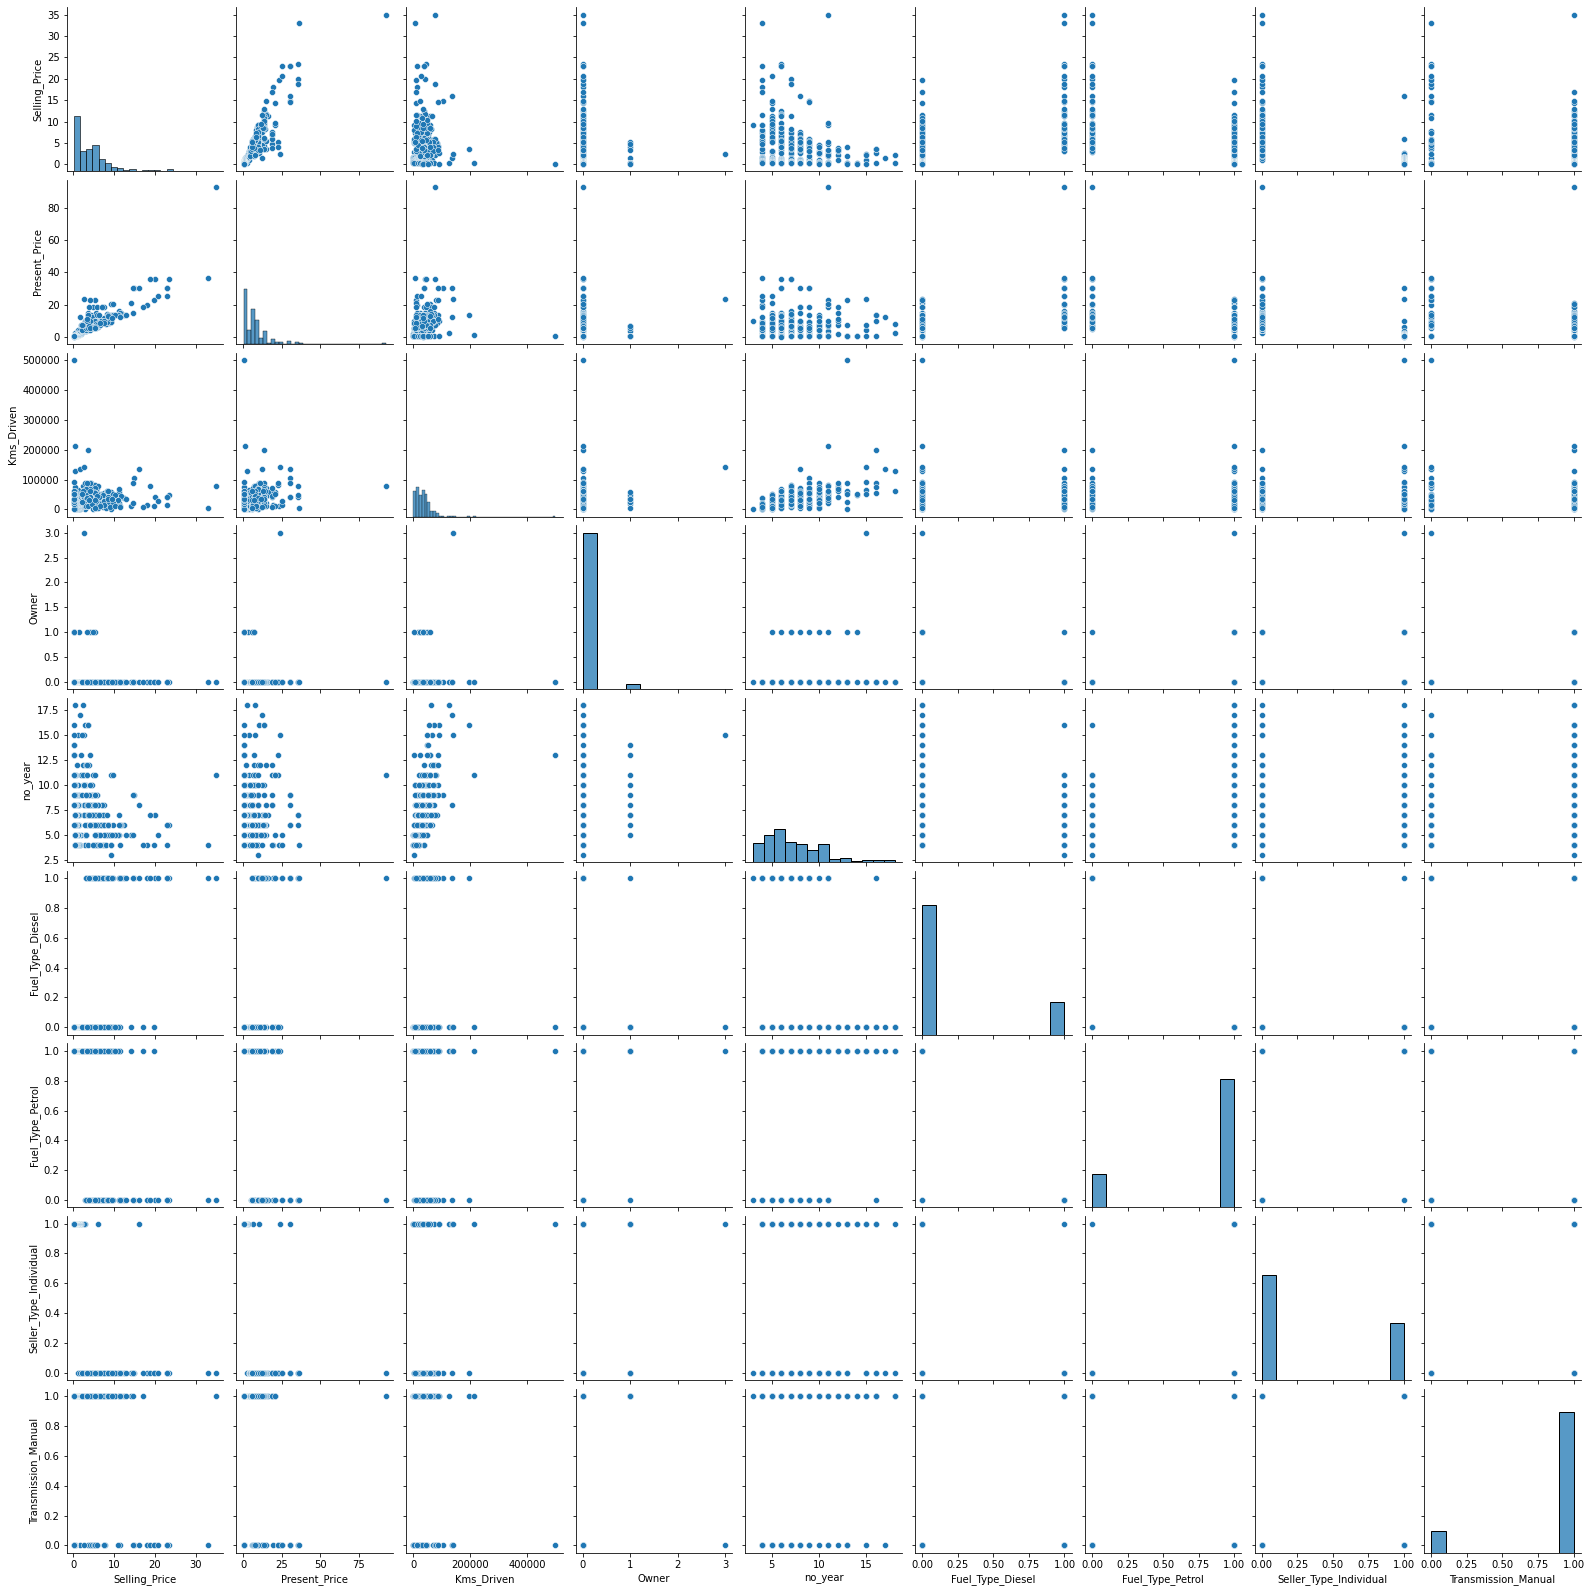

In [22]:
import seaborn as sns
sns.pairplot(final_dataset)

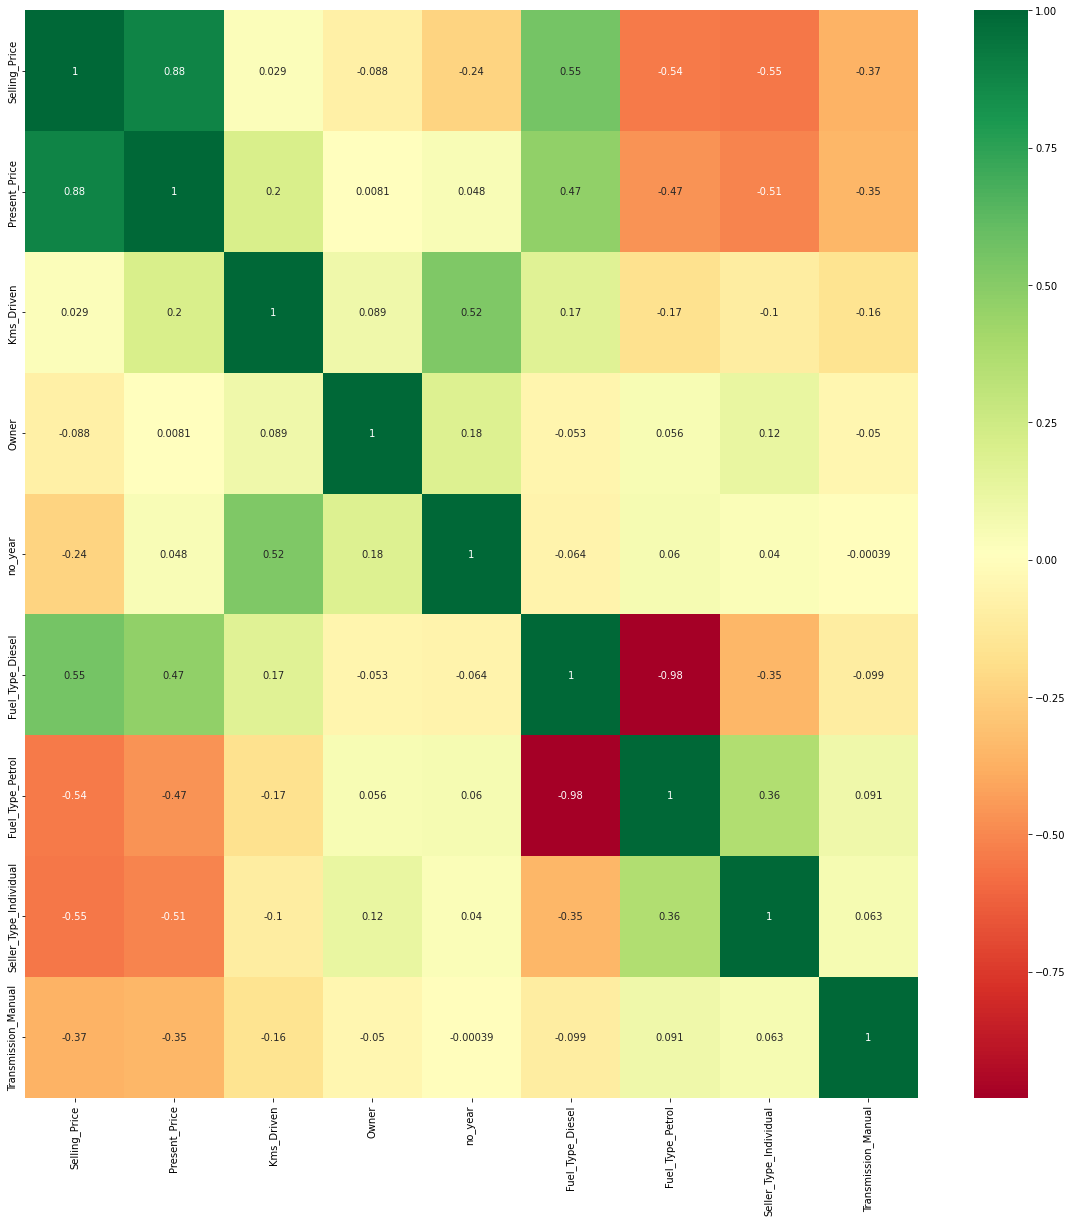

In [23]:
#get correlations of each features in dataset
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### 8.	Data Division for Training and Test.

Checking our data values

In [24]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


Our output feature is Selling price and Inpur features are remaining data frame. So, We will create dataframe for traing and test data

In [25]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [26]:
#independent feature
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [27]:
#dependent feature
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### 9.	Model Designing.

Now we will determine which features are important for us to determine dependet variable.

In [28]:
### Feature Importance
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [29]:
print(model.feature_importances_)

[3.85505963e-01 4.34980805e-02 3.78407931e-04 7.29607315e-02
 2.21069149e-01 1.53135092e-02 1.30012911e-01 1.31261247e-01]


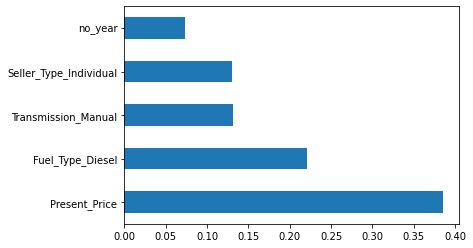

In [30]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
regressor=RandomForestRegressor()

In [34]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [37]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [39]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = 1)

In [40]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [42]:
rf_random.best_score_

-3.9946892878547766

In [43]:
predictions=rf_random.predict(X_test)

C:\Users\MH\.conda\envs\pgddss_project_satish\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

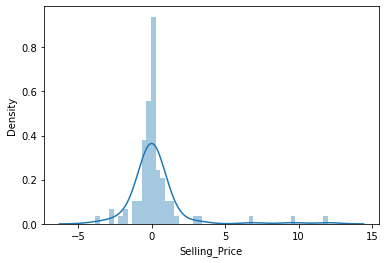

In [44]:
sns.distplot(y_test-predictions)

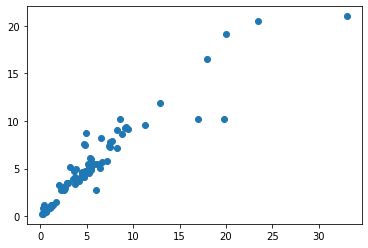

In [45]:
plt.scatter(y_test,predictions)

In [46]:
from sklearn import metrics

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8939315384615363
MSE: 4.0092727484758255
RMSE: 2.002316845176064


### 10.	Exporting the Model.

In [48]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_project_satish.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)